In [45]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from keras.utils import to_categorical


In [41]:
deep_model = Sequential()
deep_model.add(Dense( 62, input_dim=62, activation = 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 10, activation= 'relu'))
deep_model.add(Dense( units = 13, activation= 'softmax'))
deep_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [34]:
# Function to import the Audio features dataset 
def importdata(): 
    my_data = pd.read_csv('all_strokes.csv') 
      
    # Printing the dataswet shape 
    print ("Dataset Lenght: ", len(my_data)) 
    print ("Dataset Shape: ", my_data.shape) 
      
    # Printing the dataset obseravtions 
    print ("Dataset: ",my_data.head()) 
    return my_data

In [35]:
# Function to split the dataset into train and test set
def splitdataset(my_data): 
  
    # Seperating the target variable 
    X = my_data.iloc[:,:-1] 
    y = my_data["output"] 
  
    # Spliting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, y, test_size = 0.3, random_state = 100) 
      
    return X, y, X_train, X_test, y_train, y_test

In [51]:
# Driver code 
def main(): 
      
    # Building Phase 
    data = importdata() 
    X, y, X_train, X_test, y_train, y_test = splitdataset(data) 
     
    le = preprocessing.LabelEncoder()
    
    
    y_train_int = le.fit_transform(y_train)
    y_test_int = le.fit_transform(y_test)
    
    y_train_binary = to_categorical(y_train_int)
    y_test_binary = to_categorical(y_test_int)
    
    deep_history = deep_model.fit(X_train, y_train_binary, epochs = 50, validation_data = (X_test, y_test_binary))
    
    #Accuracy of the model
    plt.plot(deep_history.history['acc'])
    plt.plot(deep_history.history['val_acc'])
    plt.title("Accuracy")
    plt.legend(['train', 'test'])
    plt.show()
    
    #Loss function of the model
    plt.plot(deep_history.history['loss'])
    plt.plot(deep_history.history['val_loss'])
    plt.plot('Loss')
    plt.legend(['Train','Test'])
    plt.show()

Dataset Lenght:  21361
Dataset Shape:  (21361, 63)
Dataset:     Mean_Mem20_ZeroCrossings_HopSize512_WinSize512_Sum_AudioCh0  \
0                                           0.048828             
1                                           0.048730             
2                                           0.047363             
3                                           0.045996             
4                                           0.044727             

   Mean_Mem20_Centroid_Power_powerFFT_WinHamming_HopSize512_WinSize512_Sum_AudioCh0  \
0                                           0.036029                                  
1                                           0.035697                                  
2                                           0.034925                                  
3                                           0.033907                                  
4                                           0.032867                                  

   Mean_Mem20_Rollo

14952/14952 [==============================] - 3s 218us/step - loss: 0.0264 - acc: 0.9922 - val_loss: 0.0288 - val_acc: 0.9920
Epoch 2/50
14952/14952 [==============================] - 5s 356us/step - loss: 0.0141 - acc: 0.9958 - val_loss: 0.0383 - val_acc: 0.9902
Epoch 3/50
14952/14952 [==============================] - 3s 218us/step - loss: 0.0202 - acc: 0.9933 - val_loss: 0.0326 - val_acc: 0.9920
Epoch 4/50
14952/14952 [==============================] - 3s 201us/step - loss: 0.0114 - acc: 0.9964 - val_loss: 0.0565 - val_acc: 0.9852
Epoch 5/50
14952/14952 [==============================] - 3s 189us/step - loss: 0.0177 - acc: 0.9947 - val_loss: 0.0405 - val_acc: 0.9908
Epoch 6/50
14952/14952 [==============================] - 3s 186us/step - loss: 0.0339 - acc: 0.9912 - val_loss: 0.0388 - val_acc: 0.9897
Epoch 7/50
14952/14952 [==============================] - 3s 172us/step - loss: 0.0174 - acc: 0.9944 - val_loss: 0.0298 - val_acc: 0.9928
Epoch 8/50
14952/14952 [=====================

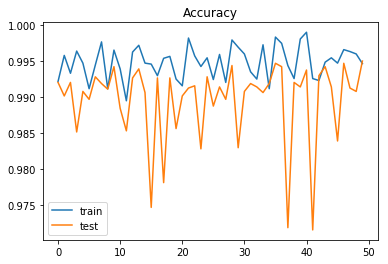

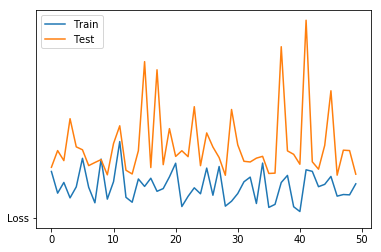

In [52]:
# Calling main function 
if __name__=="__main__": 
    main() 